In [1]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

<module 'src.config' from '/home/deus/Documents/trajectory-prediction/src/config.py'>

In [2]:
# load input
# since we use a different file then for training we can use everything for eval
file_path = "data/medium_ab.csv"
_, eval_data, _ = parsing.parse_atc_day(file_path, train_ratio=0.02, eval_ratio=0.98)

100%|██████████| 1058/1058 [00:16<00:00, 63.16it/s] 


1058 unique ids found. Generated 247640 sequences total from 580 trajectories.
Skipped 457 trajectories.
        307 too short
        150 frequency issues (like gaps)
    
Skipped 15 sequences (0.006%) because of abnormally high absolute value after normalization
Dividing 580 human trajectories: 11 training, 569 eval, 0 test
train (7380, 40, 2) float64 (7380, 25) float32 (7380, 40, 2) float64
eval (240260, 40, 2) float64 (240260, 25) float32 (240260, 40, 2) float64


In [ ]:
m = None
m = model_path.ModelPath(uses_goal=False)
m.load('path_simple_lstm')

In [3]:
m = None
m = model_path.ModelPath(uses_goal=False)
m.load('path_simple_cnn')

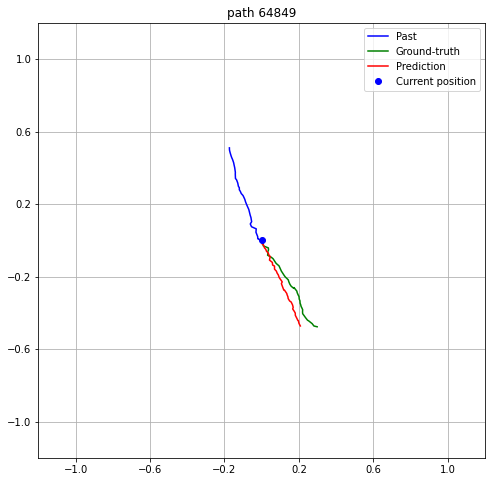

In [26]:
reload(visualization)
visualization.draw_path_batch(x=eval_data[0], ground_truth=eval_data[2], prediction_model=m, rnd=True)

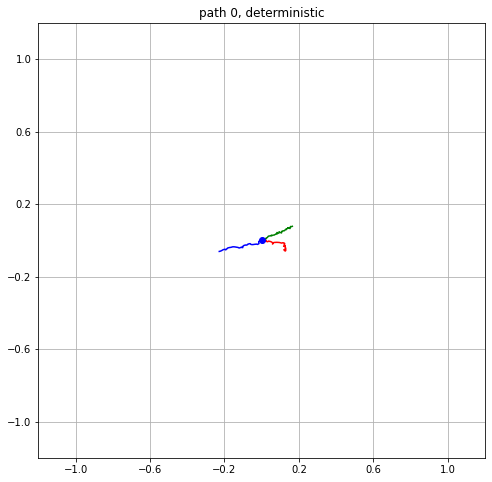

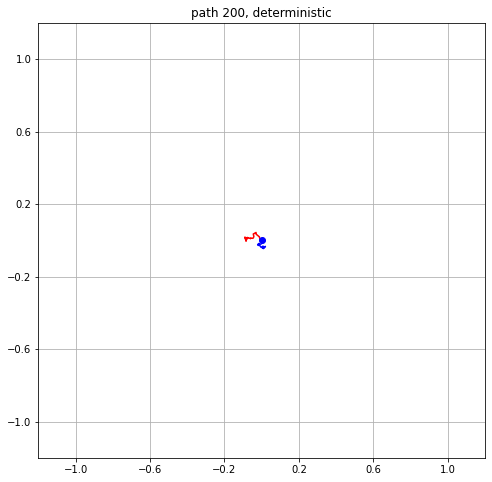

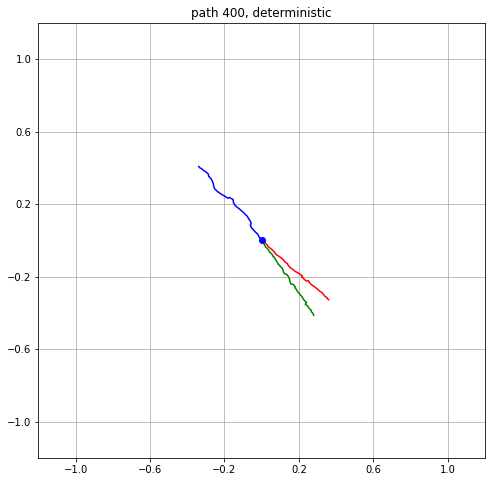

In [7]:
N = 0
multiplier = 200
amount = 3

for i in range(amount):
    n = N + multiplier * i

    x = eval_data[0][n]
    y = eval_data[2][n]

    prediction = m.predict_once(x)
    visualization.draw_path(x, y, predictions=[prediction], name=f"path {n}, deterministic")